# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from scipy import stats
from IPython.display import display
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

## Importing the dataset

In [2]:
data = pd.read_csv("C:/Users/SONY/Desktop/Practice/Bank loan data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Understanding the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Descriptive statistics of the data-sets

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data.shape

(614, 13)

In [9]:
data.index

RangeIndex(start=0, stop=614, step=1)

In [10]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
mean = np.mean(data)
mean

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [12]:
mode = stats.mode(data)
mode

ModeResult(mode=array([['LP002255', 'Male', 'Yes', '0', 'Graduate', 'No', 2500, 0.0,
        120.0, 360.0, 1.0, 'Semiurban', 'Y']], dtype=object), count=array([[  1, 489, 398, 345, 480, 500,   9, 273,  20, 512, 475, 233, 422]]))

In [13]:
SD = data.std()
SD

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

In [14]:
skewness = data.skew()
skewness

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [15]:
kurtosis = data.kurtosis()
kurtosis

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

# Data Cleaning

In [16]:
data=data.drop(['Loan_ID'],axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Checking about duplicate values in the data

In [17]:
data_dup=data.duplicated()
data_dup.sum()

0

##  Handling missing values in the data

In [18]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
data["LoanAmount"] = data["LoanAmount"].replace(np.NaN, data["LoanAmount"].mean())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].replace(np.NaN, data["Loan_Amount_Term"].mean())
data["Credit_History"] = data["Credit_History"].replace(np.NaN, data["Credit_History"].mean())
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
data=data.dropna()
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
data.shape

(554, 12)

## Checking the Categorical data

In [22]:
data['Gender'].value_counts()

Male      453
Female    101
Name: Gender, dtype: int64

In [23]:
data['Married'].value_counts()

Yes    362
No     192
Name: Married, dtype: int64

In [24]:
data['Dependents'].value_counts()

0     319
1      95
2      94
3+     46
Name: Dependents, dtype: int64

In [25]:
data['Education'].value_counts()

Graduate        431
Not Graduate    123
Name: Education, dtype: int64

In [26]:
data['Self_Employed'].value_counts()

No     478
Yes     76
Name: Self_Employed, dtype: int64

In [27]:
data['Property_Area'].value_counts()

Semiurban    211
Urban        180
Rural        163
Name: Property_Area, dtype: int64

In [28]:
data['Loan_Status'].value_counts()

Y    382
N    172
Name: Loan_Status, dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

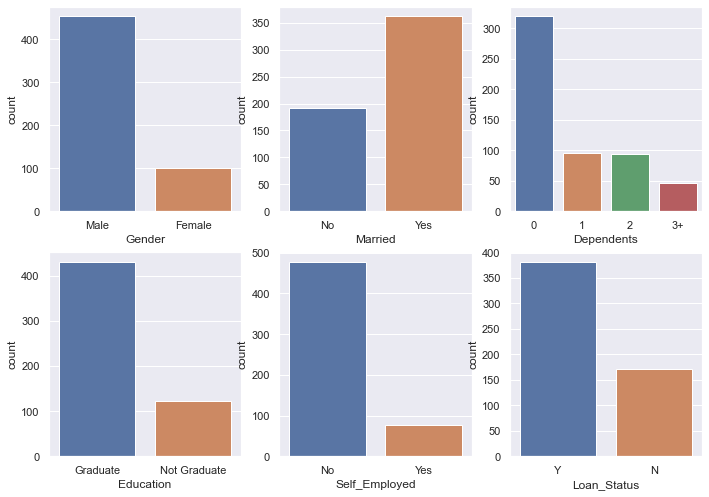

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", data=data)
plt.subplot(232)
sns.countplot(x="Married", data=data)
plt.subplot(233)
sns.countplot(x="Dependents", data=data)
plt.subplot(234)
sns.countplot(x="Education", data=data)
plt.subplot(235)
sns.countplot(x="Self_Employed", data=data)
plt.subplot(236)
sns.countplot(x="Loan_Status", data=data)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

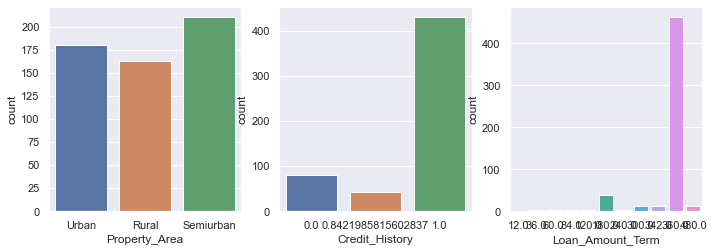

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Property_Area", data=data)
plt.subplot(232)
sns.countplot(x="Credit_History", data=data)
plt.subplot(233)
sns.countplot(x="Loan_Amount_Term", data=data)

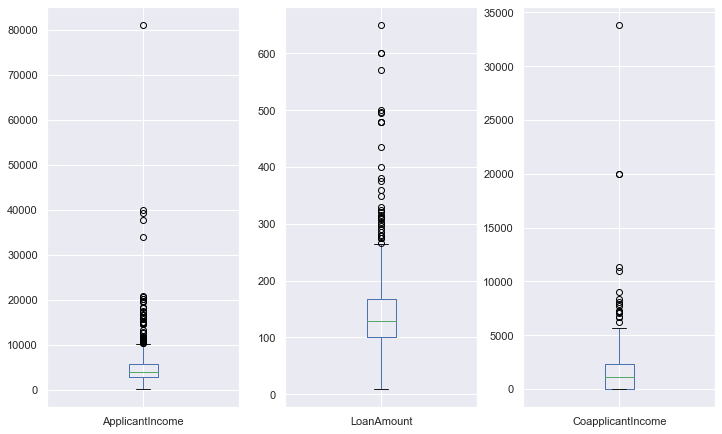

In [31]:
plt.subplot(131)
data['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
data['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
data['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

## Bivariate Analysis

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

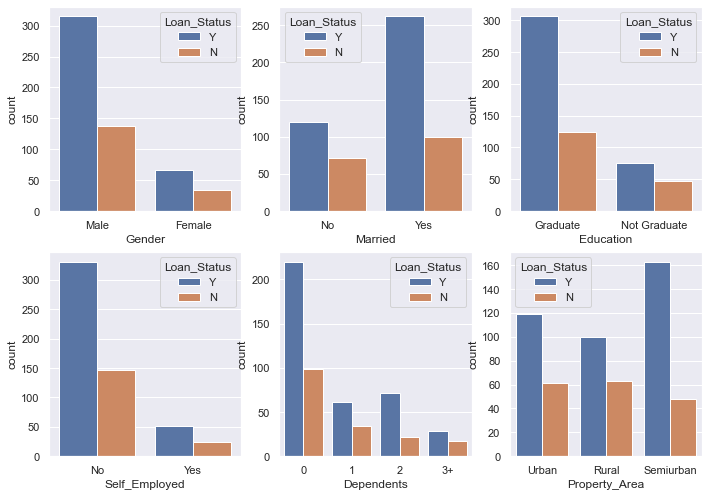

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=data)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=data)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=data)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=data)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=data)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=data)

## Multivariate analysis

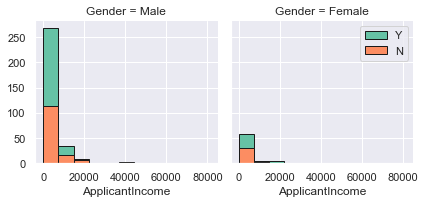

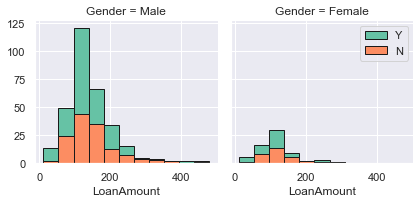

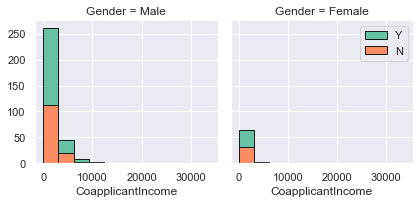

In [33]:
bins = np.linspace(data.ApplicantIncome.min(), data.ApplicantIncome.max(),12)
graph = sns.FacetGrid(data, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()
bins = np.linspace(data.Loan_Amount_Term.min(), data.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(data, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()
bins = np.linspace(data.CoapplicantIncome.min(), data.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(data, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

# Data Encoding

In [34]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.103279,0.510741,0.002670,-0.043985
CoapplicantIncome,-0.103279,1.000000,0.193454,-0.010906,0.000350
LoanAmount,0.510741,0.193454,1.000000,0.075514,-0.025314
Loan_Amount_Term,0.002670,-0.010906,0.075514,1.000000,0.023112
Credit_History,-0.043985,0.000350,-0.025314,0.023112,1.000000


In [35]:
le = preprocessing.LabelEncoder()
Gender_tr=le.fit_transform(data.Gender) 
PropertyArea_tr=le.fit_transform(data.Property_Area)  
Married_tr=le.fit_transform(data.Married)  
Education_tr=le.fit_transform(data.Education)  
SelfEmployed_tr=le.fit_transform(data.Self_Employed)  
LoanStatus_tr=le.fit_transform(data.Loan_Status)  
Dependents_tr=le.fit_transform(data.Dependents)  

data['Gender'] = Gender_tr
data['Property_Area'] = PropertyArea_tr
data['Married'] = Married_tr
data['Education'] = Education_tr
data['Self_Employed'] = SelfEmployed_tr
data['Loan_Status'] = LoanStatus_tr
data['Dependents'] = Dependents_tr
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [36]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# Univariate Selection

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,0:11] 
y = data.iloc[:,-1]   
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(12,'Score')) 

                Specs        Score
5     ApplicantIncome  5641.282053
6   CoapplicantIncome  3104.018548
7          LoanAmount    72.627413
9      Credit_History    22.385541
3           Education     2.949162
1             Married     1.980862
10      Property_Area     0.433324
8    Loan_Amount_Term     0.206218
4       Self_Employed     0.121214
0              Gender     0.072010
2          Dependents     0.032353


# Feature Importance

[0.0241645  0.02155611 0.0592224  0.02279551 0.02319013 0.17563958
 0.11405496 0.17320451 0.05023303 0.28591556 0.05002371]


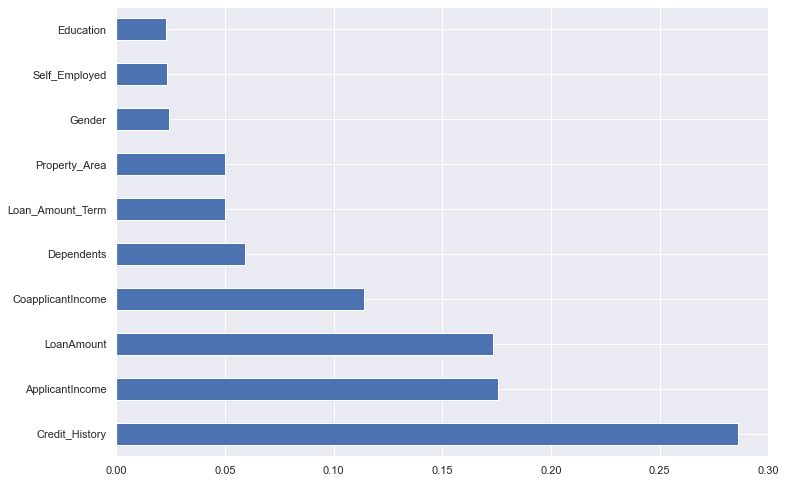

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

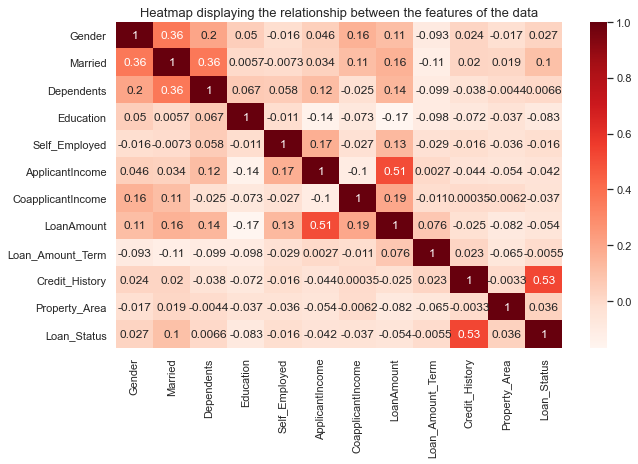

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

In [40]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.363458,0.202534,0.049767,-0.015551,0.045901,0.160344,0.114102,-0.093140,0.023525,-0.017248,0.026701
Married,0.363458,1.000000,0.363957,0.005733,-0.007284,0.034056,0.114678,0.159702,-0.114159,0.019741,0.018775,0.101573
Dependents,0.202534,0.363957,1.000000,0.066781,0.058420,0.115940,-0.024796,0.139568,-0.098825,-0.038244,-0.004362,0.006596
Education,0.049767,0.005733,0.066781,1.000000,-0.011029,-0.142851,-0.072643,-0.167513,-0.097562,-0.071971,-0.037421,-0.082720
Self_Employed,-0.015551,-0.007284,0.058420,-0.011029,1.000000,0.166292,-0.027241,0.129511,-0.029426,-0.015653,-0.035581,-0.015924
ApplicantIncome,0.045901,0.034056,0.115940,-0.142851,0.166292,1.000000,-0.103279,0.510741,0.002670,-0.043985,-0.053950,-0.042492
CoapplicantIncome,0.160344,0.114678,-0.024796,-0.072643,-0.027241,-0.103279,1.000000,0.193454,-0.010906,0.000350,-0.006199,-0.037370
LoanAmount,0.114102,0.159702,0.139568,-0.167513,0.129511,0.510741,0.193454,1.000000,0.075514,-0.025314,-0.081544,-0.053817
Loan_Amount_Term,-0.093140,-0.114159,-0.098825,-0.097562,-0.029426,0.002670,-0.010906,0.075514,1.000000,0.023112,-0.065365,-0.005517
Credit_History,0.023525,0.019741,-0.038244,-0.071971,-0.015653,-0.043985,0.000350,-0.025314,0.023112,1.000000,-0.003254,0.528949


In [41]:
X = data[['Gender', 'Married', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]
y = data.Loan_Status
X.shape, y.shape

((554, 6), (554,))

# Modeling

## Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
DTC=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=5,min_samples_leaf=3)
DTC.fit(X_train,y_train)
pred_train_DTC = DTC.predict(X_train)
y_pred_DTC=DTC.predict(X_test)
y_pred_DTC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1])

In [43]:
from sklearn import metrics
cnf_matrix_DTC = metrics.confusion_matrix(y_test, y_pred_DTC)
cnf_matrix_DTC

array([[13, 18],
       [ 2, 78]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

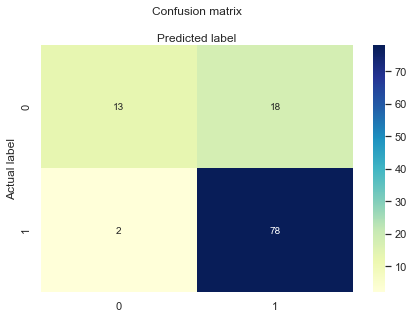

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_DTC), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
print("Training Accuracy:",metrics.accuracy_score(y_train, pred_train_DTC))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_DTC))
print("Precision:",metrics.precision_score(y_test, y_pred_DTC))
print("Recall:",metrics.recall_score(y_test, y_pred_DTC))

Training Accuracy: 0.8171557562076749
Testing Accuracy: 0.8198198198198198
Precision: 0.8125
Recall: 0.975


## Logistic Regression

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
pred_train_LR = LR.predict(X_train)
y_pred_LR=LR.predict(X_test)
y_pred_LR

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [47]:
from sklearn import metrics
cnf_matrix_LR = metrics.confusion_matrix(y_test, y_pred_LR)
cnf_matrix_LR

array([[  5,  33],
       [  1, 100]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

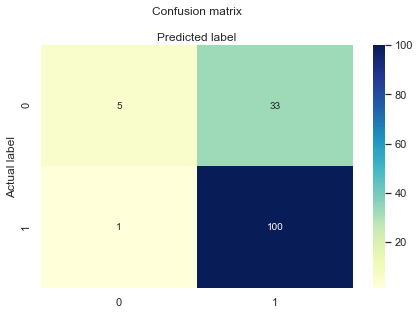

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_LR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
print("Training Accuracy:",metrics.accuracy_score(y_train, pred_train_LR))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_LR))
print("Precision:",metrics.precision_score(y_test, y_pred_LR))
print("Recall:",metrics.recall_score(y_test, y_pred_LR))

Training Accuracy: 0.7180722891566265
Testing Accuracy: 0.7553956834532374
Precision: 0.7518796992481203
Recall: 0.9900990099009901


## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
RFC = RandomForestClassifier(max_depth=4, random_state = 10) 
RFC.fit(X_train, y_train)
pred_train_RFC = RFC.predict(X_train)
y_pred_RFC = RFC.predict(X_test)
y_pred_RFC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1])

In [51]:
from sklearn import metrics
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_pred_RFC)
cnf_matrix_RF

array([[12, 19],
       [ 1, 79]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

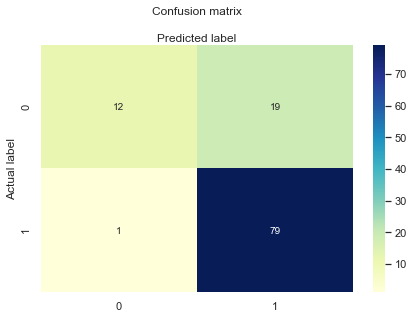

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
print("Training Accuracy",accuracy_score(y_train, pred_train_RFC))
print("Testing Accuracy",accuracy_score(y_test, y_pred_RFC))
print("Precision:",metrics.precision_score(y_test, y_pred_RFC))
print("Recall:",metrics.recall_score(y_test, y_pred_RFC))

Training Accuracy 0.8148984198645598
Testing Accuracy 0.8198198198198198
Precision: 0.8061224489795918
Recall: 0.9875


## Training and Testing Graph

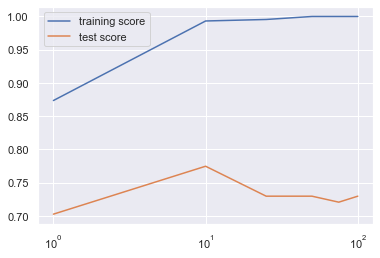

In [54]:
estimators = [1,10,25,50,75,100]
test_score = []
train_score = []
for n in estimators:
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(X_train,y_train)
    train_score.append(forest.score(X_train,y_train))
    test_score.append(forest.score(X_test,y_test))

plt.plot(estimators, train_score, label="training score")
plt.plot(estimators, test_score, label="test score")
plt.xscale('log')
plt.legend()

# Deployment

In [55]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(RFC, pickle_out) 
pickle_out.close()

In [56]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'wb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History):   
 
    # Pre-processing user input    
    if Gender == "Male":
        Gender = 0
    else:
        Gender = 1
 
    if Married == "Unmarried":
        Married = 0
    else:
        Married = 1
 
    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1  
 
    LoanAmount = LoanAmount / 1000
 
    prediction = classifier.predict( 
        [[Gender, Married, ApplicantIncome, LoanAmount, Credit_History]])
     
    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred
      
  
def main():       

    html_temp = """ 
    <div style ="background-color:light_blue;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Loan Eligiblity Prediction</h1> 
    </div> 
    """

    st.markdown(html_temp, unsafe_allow_html = True) 
 
    Gender = st.selectbox('Gender',("Male","Female"))
    Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    ApplicantIncome = st.number_input("Applicants monthly income") 
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result =""
   
    if st.button("Predict"): 
        result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History) 
        st.success('Your loan is {}'.format(result))
        print(LoanAmount)
     
if __name__=='__main__': 
    main()

Writing app.py


In [57]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "http://42ff77ade644.ngrok.io" -> "http://localhost:8501">